In [2]:
### Reloads modules properly
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.sys.path.append('../')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplhep as hep
hep.style.use('CMS')

# Optimization results

In [5]:
fast_histo = pd.read_pickle('../fastHisto_optimization_new_file.pkl')

In [6]:
fast_histo

,z0_gen,z0_MC,z0_fastHisto_0.05,z0_fastHisto_0.1,z0_fastHisto_0.15,z0_fastHisto_0.2,z0_fastHisto_0.25,z0_fastHisto_0.3,z0_fastHisto_0.35
entry,,,,,,,,,
0,5.054894,5.055163,4.980469,4.962891,5.009766,4.930890,4.930890,4.958496,5.023082
1,-3.599295,-3.608661,-3.457031,-3.457031,-3.515625,-3.515625,-3.606179,-3.500977,-3.595145
2,-0.261687,-0.261453,-0.234375,-0.265625,-0.239955,-0.270996,-0.169271,-0.179688,-0.179688
3,2.803424,2.803285,2.753906,2.753906,2.768555,2.707648,2.815755,2.815755,2.713145
4,-1.400962,-1.400667,-1.289062,-1.276507,-1.295230,-1.467634,-1.365234,-1.352983,-1.226562
...,...,...,...,...,...,...,...,...,...
222971,-0.698044,-0.698029,-0.761719,-0.750732,-0.539062,-0.725446,-0.812322,-0.748197,-0.799219
222972,0.516307,0.520282,0.878906,0.839844,0.820312,0.301339,0.344238,0.742188,0.225361
222973,-3.605887,-3.604865,-3.457031,-3.643466,-3.520508,-3.520508,-3.597656,-3.486328,-3.592969


In [7]:
from pv_utils import primary_vertex_efficiency

In [8]:
bin_widths = [0.05, 0.1, 0.15, 0.20, 0.25, 0.30, 0.35]

In [9]:
eff = []
error_low = []
error_upp = []
eff_mc = []
error_low_mc =  []
error_upp_mc = []
for bw in bin_widths:

    e_i, l_i, u_i = primary_vertex_efficiency(
        z0_gen=fast_histo["z0_gen"].values,
        z0_reco=fast_histo[f"z0_fastHisto_{bw}"].values,
    )
    eff.append(e_i)
    error_low.append(l_i)
    error_upp.append(u_i)
    
    e_i, l_i, u_i = primary_vertex_efficiency(
        z0_gen=fast_histo["z0_MC"].values,
        z0_reco=fast_histo[f"z0_fastHisto_{bw}"].values,
    )
    eff_mc.append(e_i)
    error_low_mc.append(l_i)
    error_upp_mc.append(u_i)

In [10]:
print("h")

h


Text(0.5, 1.0, 'Fast Histo bin width optimization')

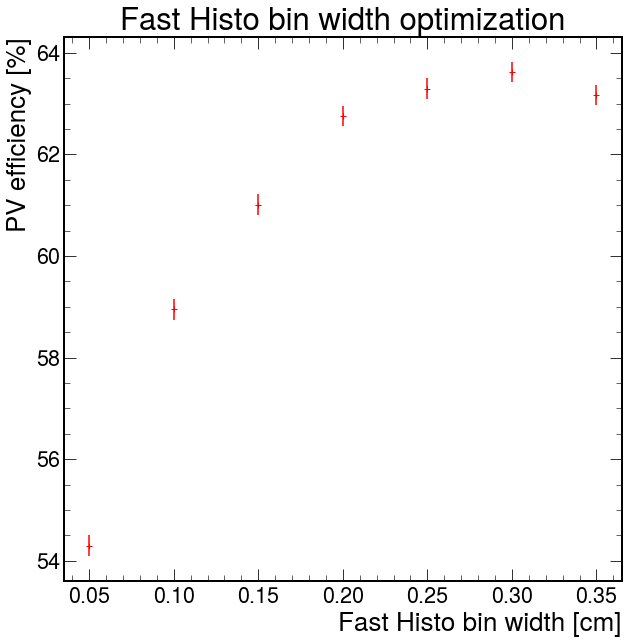

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3810, in atexit_operations
    self.reset(new_session=False)
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1421, in reset
    self.history_manager.reset(new_session)
  File "/mnt/storage/lborgna/condaenv/db-clustering/lib/python3.8/site-packages/IPython/core/history.py", line 592, in reset
    self.dir_hist[:] = [os.getcwd()]
FileNotFoundError: [Errno 2] No such file or directory


In [12]:
# plt.errorbar(bin_widths, eff, yerr=[error_low, error_upp], fmt='+k', ls = 'none', label = 'fast histo')
plt.errorbar(bin_widths, eff_mc, yerr=[error_low_mc, error_upp_mc], fmt='+r', ls ='none', label = 'mc')
plt.xlabel('Fast Histo bin width [cm]')
plt.ylabel('PV efficiency [%]')
plt.title('Fast Histo bin width optimization')

In [26]:
round(max(eff_mc),1)

63.6

Maximum efficiency achieved is about 63.6 % with over 220k events and this occurs at a bin width of about 0.3 cm, which is in-line with the Bristol thesis. (Keep in mind that the bristol thesis reported these as half-widths)

# DBSCAN optimization

In [27]:
import plotly.express as px

In [29]:
!ls -lh ../

total 165M
-rw-r--r-- 1 lborgna users 8.9K Nov 10 15:48 analysis.py
-rw-r--r-- 1 lborgna users 5.1K Nov 24 14:53 analyze_files.py
-rw-r--r-- 1 lborgna users  921 Nov 11 14:53 convert_root_to_pickle.py
-rw-r--r-- 1 lborgna users  70M Nov 12 01:31 dbscan_all_events_optimization.pkl
-rw-r--r-- 1 lborgna users  40M Nov 25 21:40 dbscan_optimization_new_file.pkl
-rw-r--r-- 1 lborgna users 1.7K Nov 25 15:38 dbscan_optimization.py
-rw-r--r-- 1 lborgna users  40M Nov 11 17:14 fastHisto_all_events_optimization.pkl
-rw-r--r-- 1 lborgna users  16M Nov 25 16:30 fastHisto_optimization_new_file.pkl
-rw-r--r-- 1 lborgna users  980 Nov 25 16:13 fasthisto_optimization.py
-rw-r--r-- 1 lborgna users 3.2K Nov 10 15:48 histograms.py
-rw-r--r-- 1 lborgna users 637K Nov 10 15:48 L1TriggerInputData.png
drwxr-xr-x 4 lborgna users 4.0K Nov 25 18:01 notebooks
drwxr-xr-x 2 lborgna users 4.0K Nov 24 14:41 plots
-rw-r--r-- 1 lborgna users 6.8K Nov 10 15:48 README.md
-rw-r--r-- 1 lborgna users 108K Nov 10 15:48 resid

In [30]:
optimization_results = pd.read_pickle('../dbscan_optimization_new_file.pkl')

In [31]:
optimization_results

,z0_gen,z0_MC,z0_dbscan_e0.05_min_2,z0_dbscan_e0.06_min_2,z0_dbscan_e0.08_min_2,z0_dbscan_e0.1_min_2,z0_dbscan_e0.15_min_2,z0_dbscan_e0.2_min_2,z0_dbscan_e0.25_min_2,z0_dbscan_e0.05_min_3,...,z0_dbscan_e0.15_min_3,z0_dbscan_e0.2_min_3,z0_dbscan_e0.25_min_3,z0_dbscan_e0.05_min_4,z0_dbscan_e0.06_min_4,z0_dbscan_e0.08_min_4,z0_dbscan_e0.1_min_4,z0_dbscan_e0.15_min_4,z0_dbscan_e0.2_min_4,z0_dbscan_e0.25_min_4
entry,,,,,,,,,,,,,,,,,,,,,
0,5.054894,5.055163,-1.171875,4.980469,4.980469,4.980469,4.980469,4.980469,4.980469,-1.289062,...,4.980469,4.980469,4.980469,-1.083984,0.175781,0.175781,0.175781,0.820312,4.980469,4.980469
1,-3.599295,-3.608661,0.117188,-3.603516,-3.603516,-3.603516,-2.226562,-2.226562,-2.431641,-0.761719,...,-2.226562,-2.226562,-2.431641,-1.699219,0.585938,0.585938,0.585938,-2.050781,-2.226562,-2.431641
2,-0.261687,-0.261453,2.519531,-0.175781,-0.175781,-0.175781,-0.175781,-0.175781,-0.087891,2.519531,...,-0.175781,-0.175781,-0.087891,2.343750,-0.175781,-0.175781,-0.175781,-0.175781,-0.175781,-0.058594
3,2.803424,2.803285,0.498047,2.753906,2.753906,2.753906,2.753906,2.753906,2.753906,-1.435547,...,2.753906,2.753906,2.753906,-1.230469,2.753906,2.753906,2.753906,2.753906,2.695312,2.753906
4,-1.400962,-1.400667,-1.640625,-1.289062,-1.289062,-1.289062,-1.347656,-2.050781,-2.021484,-2.050781,...,-1.347656,-2.050781,-2.021484,-1.933594,-1.289062,-1.289062,-1.289062,-1.347656,-1.699219,-2.021484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222971,-0.698044,-0.698029,-0.410156,-0.703125,-0.703125,-0.703125,-0.703125,-0.703125,-0.644531,-1.113281,...,-0.703125,-0.703125,-0.644531,-0.966797,-0.703125,-0.703125,-0.703125,-0.703125,-0.703125,-0.644531
222972,0.516307,0.520282,-0.439453,-1.552734,-1.552734,-1.552734,0.498047,0.498047,0.351562,0.029297,...,0.498047,0.498047,0.351562,-0.878906,-0.966797,-0.966797,-0.966797,0.498047,0.498047,0.351562
222973,-3.605887,-3.604865,-0.556641,-3.574219,-3.574219,-3.574219,-3.574219,-3.515625,-3.515625,-0.205078,...,-3.574219,-3.515625,-3.515625,-0.585938,-0.292969,-0.292969,-0.292969,-3.574219,-3.515625,-3.515625


In [ ]:
fig = px.scatter_3d(
    optimization_results,
    x="eps",
    y="minPts",
    z="Efficiency",
    color="Efficiency",
    color_continuous_scale=px.colors.diverging.RdYlGn,
)